In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler
aus_df1 = pd.read_csv('database_AUS.csv')
usa_df1 = pd.read_csv('database_USA.csv')
ind_df1 = pd.read_csv('database_IND.csv')

df = pd.concat([aus_df1, usa_df1, ind_df1])

In [36]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
count,13292.000000,13220.000000,13220.000000,10654.000000,0.0,12860.0,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000,0.0
mean,117.738717,35.053213,-73.794217,1998.184904,NaN,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,NaN
std,347.169038,15.444195,62.868834,24.017781,NaN,0.0,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305,NaN
min,0.000000,-42.888300,-171.712400,1896.000000,NaN,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,NaN
25%,1.500000,33.901700,-104.659875,1988.000000,NaN,2019.0,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250,NaN
50%,5.500000,38.389750,-87.346000,2008.000000,NaN,2019.0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,NaN
75%,52.725000,42.175125,-75.475925,2015.000000,NaN,2019.0,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249,NaN
max,6809.000000,425.246100,153.434100,2020.000000,NaN,2019.0,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000,NaN


In [38]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url          

In [40]:
print("No.Of Duplicate Rows",df.duplicated().sum())

No.Of Duplicate Rows 0


In [41]:
df.shape

(13298, 27)

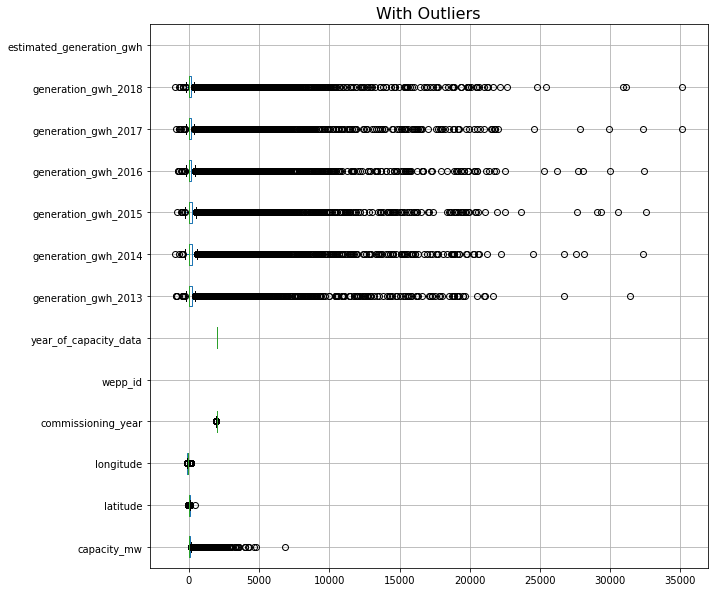

In [42]:

plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

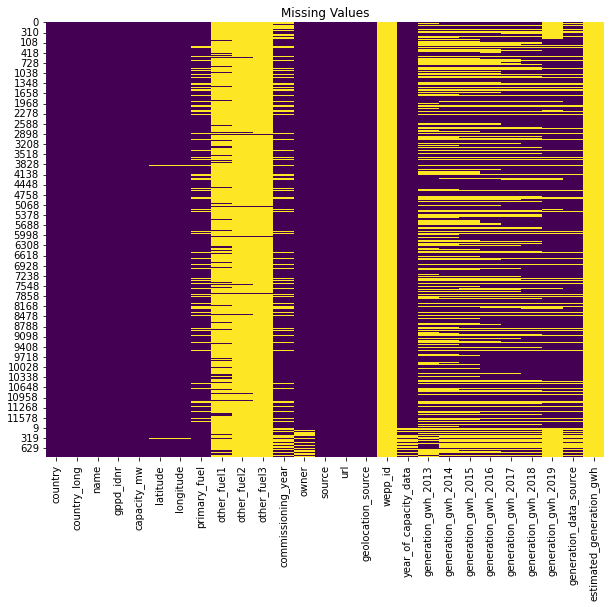

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values")
plt.show()

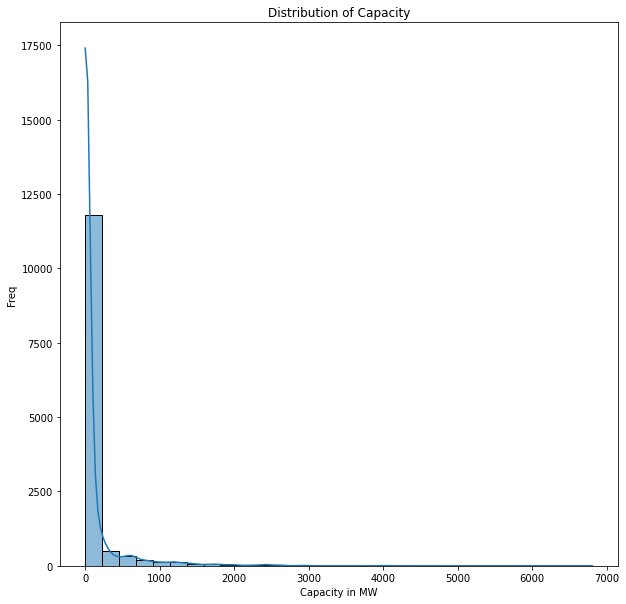

In [44]:
plt.figure(figsize=(10,10))
sns.histplot(df['capacity_mw'].dropna(), bins=30, kde=True)
plt.title("Distribution of Capacity")
plt.xlabel("Capacity in MW")
plt.ylabel("Freq")
plt.show()

In [45]:
df = df.reset_index(drop=True)

df.columns = pd.Index([f"{col}_{idx}" if col in df.columns[:idx] else col for idx, col in enumerate(df.columns)])

# Bivariate analysis

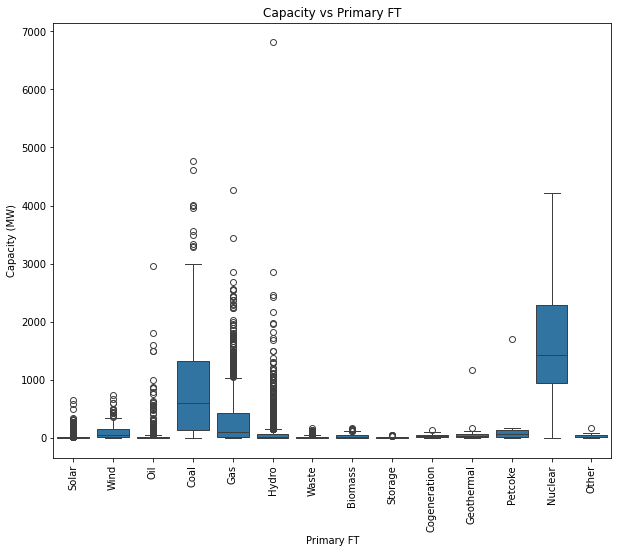

In [46]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=df)
plt.title("Capacity vs Primary FT")
plt.xlabel("Primary FT")
plt.ylabel("Capacity (MW)")
plt.xticks(rotation=90)
plt.show()

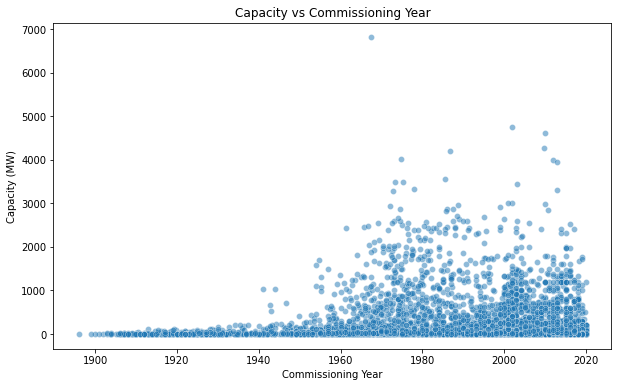

In [47]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='commissioning_year', y='capacity_mw', alpha=0.5)
plt.title("Capacity vs Commissioning Year")
plt.xlabel("Commissioning Year")
plt.ylabel("Capacity (MW)")
plt.show()

# Multivariate analysis

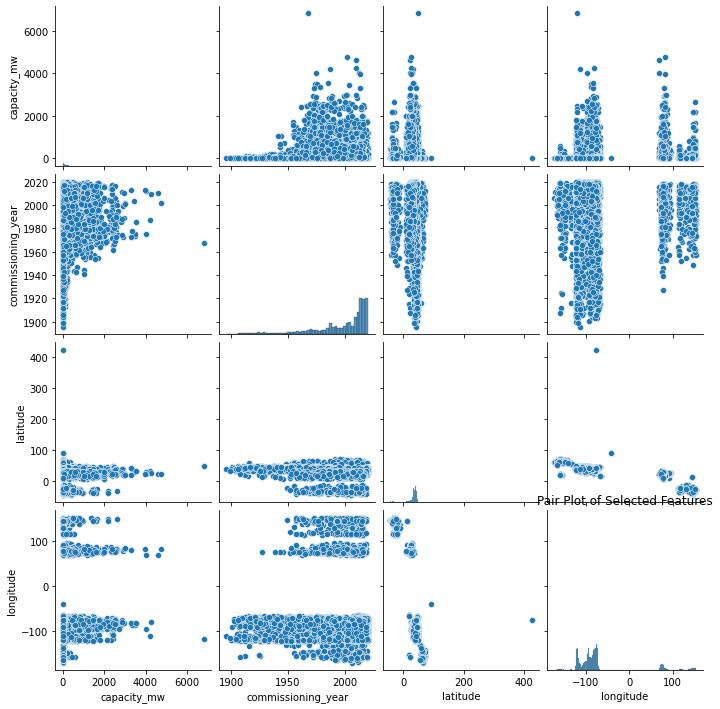

In [48]:
sns.pairplot(df[['capacity_mw', 'commissioning_year', 'latitude', 'longitude']])
plt.title("Pair Plot of Selected Features")
plt.show()

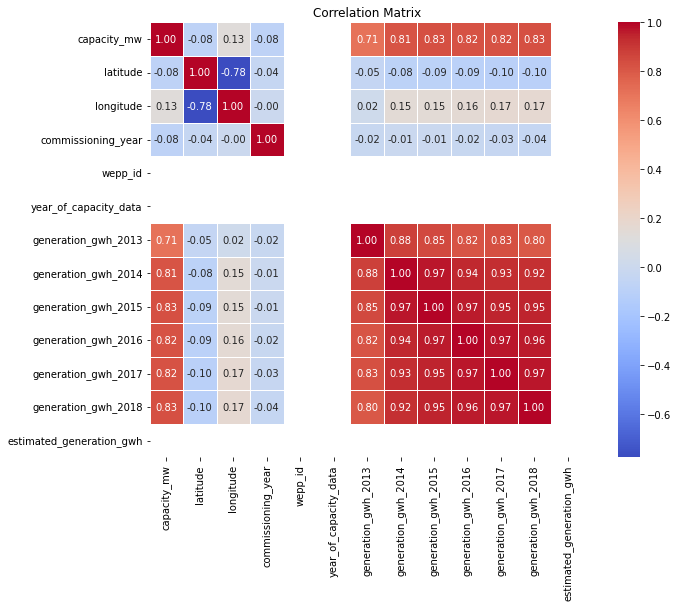

In [49]:
corr_mat = df.select_dtypes(include=[float]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [50]:

print(df.isnull().sum())
threshold = 50
df.dropna(thresh=threshold/100 * df.shape[0], axis=1, inplace=True)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
categorical_cols =df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64


In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df.fillna(df.median(numeric_only=True), inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [52]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le1 = LabelEncoder()
    df[column] = le1.fit_transform(df[column])
    label_encoders[column] = le1

In [53]:
for col in df.select_dtypes(include='float64').columns:
    df[col] = df[col].astype('float32')
X = df.drop('primary_fuel', axis=1) 
y = df['primary_fuel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.ensemble import RandomForestClassifier

randomforestM = RandomForestClassifier(random_state=42)
randomforestM.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
rf_prediction = randomforestM.predict(X_test)
rf_acc = accuracy_score(y_test, rf_prediction)
rf_cvscore = cross_val_score(randomforestM, X, y, cv=5)

print(f"Random Forest Accuracy: {rf_acc}")
print(f"Cross-Validation Score: {np.mean(rf_cvscore)}")
print(classification_report(y_test, rf_prediction))

Random Forest Accuracy: 0.8533834586466166
Cross-Validation Score: 0.7403982502325765
              precision    recall  f1-score   support

           0       0.76      0.40      0.53        47
           1       0.75      0.64      0.69       120
           2       0.00      0.00      0.00         7
           3       0.70      0.73      0.71       388
           4       0.75      0.27      0.40        11
           5       0.85      0.89      0.87       331
           6       0.86      0.63      0.73        19
           7       0.80      0.76      0.78       190
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.94      0.99      0.97      1147
          11       1.00      0.90      0.95        20
          12       0.66      0.57      0.61       113
          13       0.85      0.82      0.83       265

    accuracy                           0.85      2660
   macro avg       0.64      0.54      0.58     

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


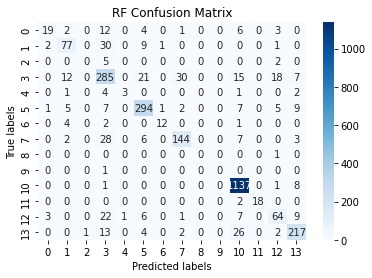

In [56]:
rf_cm1 = confusion_matrix(y_test, rf_prediction)
sns.heatmap(rf_cm1, annot=True, fmt='g', cmap='Blues')
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Random Forest Classifier
Accuracy: High which is 85 perc.
Cross-Validation Score is also High which is 75 perc approx.
Confusion Matrix and Classification Report, both indicates good performance

In [57]:
from sklearn.linear_model import LogisticRegression

log_reggresion = LogisticRegression(max_iter=1000, random_state=42)
log_reggresion.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [58]:
log_reg_predion = log_reggresion.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_predion)
log_reg_cvscore = cross_val_score(log_reggresion, X, y, cv=5)

print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"Cross-Validation Score: {np.mean(log_reg_cvscore)}")
print(classification_report(y_test, log_reg_predion))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.6443609022556391
Cross-Validation Score: 0.6142257957794071
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.57      0.43      0.49       120
           2       0.00      0.00      0.00         7
           3       0.51      0.51      0.51       388
           4       0.00      0.00      0.00        11
           5       0.66      0.67      0.67       331
           6       0.83      0.53      0.65        19
           7       0.42      0.42      0.42       190
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.74      0.92      0.82      1147
          11       0.00      0.00      0.00        20
          12       0.07      0.03      0.04       113
          13       0.54      0.35      0.42       265

    accuracy                           0.64      2660
   macro avg       0.31      0.28      0.2

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

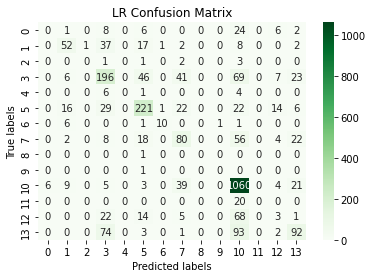

In [59]:

log_reg_cm1 = confusion_matrix(y_test, log_reg_predion)
sns.heatmap(log_reg_cm1, annot=True, fmt='g', cmap='Greens')
plt.title('LR Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Logistic regression Accuracy: low which is 64 perc. Cross-Validation Score is also low which is 61 perc approx. Confusion Matrix and Classification Report, both indicates poor performance as compared to random forest model

# Prediction of capacity_mw

In [60]:
X = df.drop('capacity_mw', axis=1)
y = df['capacity_mw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
pred_rf = rf_regressor.predict(X_test)
mse_rf1 = mean_squared_error(y_test, pred_rf)
r2_rf1 = r2_score(y_test, pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rf1}, R2: {r2_rf1}")

Random Forest Regressor - MSE: 20797.502410663797, R2: 0.8391740076954863


In [66]:
rf_cv_mse1 = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation MSE: {np.mean(rf_cv_mse1)}")

Random Forest Cross-Validation MSE: -57375.174243603775


In [67]:
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

LinearRegression()

In [68]:
pred_lr = linearreg.predict(X_test)
mse_lr1 = mean_squared_error(y_test, pred_lr)
r2_lr1 = r2_score(y_test, pred_lr)
print(f"Linear Regression - MSE: {mse_lr1}, R2: {r2_lr1}")


Linear Regression - MSE: 33178.55588840125, R2: 0.7434319723291913


In [69]:
lr_cv_mse1 = cross_val_score(linearreg, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression Cross-Validation MSE: {np.mean(lr_cv_mse1)}")

Linear Regression Cross-Validation MSE: -46619.26531897338


The Random Forest Regressor has given the lower MSE compared to the Linear Regression model, that indicates a better performance in predicting the target variable with minimal errors.
Higher R-squared in the Random Forest model means it explained more variance in the data compared to the Linear Regression model.
The Random Forest model showed consistently low cross-validation MSE scores, indicating robust performance across different subsets of the data.